In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, recall_score, \
                            classification_report, roc_auc_score, precision_score, \
                            f1_score, precision_recall_curve, plot_precision_recall_curve, average_precision_score, \
                            auc

In [2]:
import sklearn
print(sklearn.__version__) # 0.22 required for plot_precision_recall_curve

0.23.2


In [3]:
nfpr, ntpr, nthresh = np.loadtxt('/MFMDatasets/MFM_bopf/src/multi_predict/RF/output/ft_test.dat', delimiter=',')
nprec, nrec, pr_thresh = np.loadtxt('/MFMDatasets/MFM_bopf/src/multi_predict/RF/output/pr_test.dat', delimiter=',')
ny_test, ny_pred = np.loadtxt('/MFMDatasets/MFM_bopf/src/multi_predict/RF/output/pred_test.dat', delimiter=',')
nprobs = np.loadtxt('/MFMDatasets/MFM_bopf/src/multi_predict/RF/output/probs_test.dat', delimiter=',')
nprob1 = nprobs[:,1]

In [4]:
nprec_s1 = precision_score(ny_test, ny_pred)
nprec_s2 = precision_score(ny_test, ny_pred, pos_label=2)
nprec_both = precision_score(ny_test, ny_pred, average=None)
print(f'1={nprec_both[0]}')
print(f'2={nprec_both[1]}')
nprec_s_micro = precision_score(ny_test, ny_pred, average='micro')
nprec_s_macro = precision_score(ny_test, ny_pred, average='macro')
nprec_s_weighted = precision_score(ny_test, ny_pred, average='weighted')
print(f'nprec_s1 = {nprec_s1}')
print(f'nprec_s2 = {nprec_s2}')
print(f'nprec_s_micro = {nprec_s_micro}')
print(f'nprec_s_macro = {nprec_s_macro}')
print(f'nprec_s_weigh = {nprec_s_weighted}')
nrecall_s1 = recall_score(ny_test, ny_pred)
nrecall_s2 = recall_score(ny_test, ny_pred, pos_label=2)
nrecall_s_micro = recall_score(ny_test, ny_pred, average='micro')
nrecall_s_macro = recall_score(ny_test, ny_pred, average='macro')
nrecall_s_weighted = recall_score(ny_test, ny_pred, average='weighted')
print(f'nrecall_s1 = {nrecall_s1}')
print(f'nrecall_s2 = {nrecall_s2}')
print(f'nrecall_s_micro = {nrecall_s_micro}')
print(f'nrecall_s_macro = {nrecall_s_macro}')
print(f'nrecall_s_weigh = {nrecall_s_weighted}')
nf1_s1 = f1_score(ny_test, ny_pred)
nf1_s2 = f1_score(ny_test, ny_pred, pos_label=2)
nf1_s_micro = f1_score(ny_test, ny_pred, average='micro')
nf1_s_macro = f1_score(ny_test, ny_pred, average='macro')
nf1_s_weighted = f1_score(ny_test, ny_pred, average='weighted')
print(f'nf1_s1 = {nf1_s1}')
print(f'nf1_s2 = {nf1_s2}')
print(f'nf1_s_micro = {nf1_s_micro}')
print(f'nf1_s_macro = {nf1_s_macro}')
print(f'nf1_s_weigh = {nf1_s_weighted}')

1=0.9950566882270481
2=0.09022254895408675
nprec_s1 = 0.9950566882270481
nprec_s2 = 0.09022254895408675
nprec_s_micro = 0.7516539623184237
nprec_s_macro = 0.5426396185905674
nprec_s_weigh = 0.9698266121805149
nrecall_s1 = 0.7482477391674218
nrecall_s2 = 0.8704061895551257
nrecall_s_micro = 0.7516539623184237
nrecall_s_macro = 0.8093269643612737
nrecall_s_weigh = 0.7516539623184237
nf1_s1 = 0.8541811809909854
nf1_s2 = 0.1634976383674458
nf1_s_micro = 0.7516539623184237
nf1_s_macro = 0.5088394096792156
nf1_s_weigh = 0.8349224046604607


In [5]:
from sklearn.metrics import fbeta_score
fbeta_05 = fbeta_score(ny_test, ny_pred, beta=0.5, pos_label=1)
print(f'fbeta_05 = {fbeta_05}')
fbeta_05 = fbeta_score(ny_test, ny_pred, beta=0.5, pos_label=2)
print(f'fbeta_05 = {fbeta_05}')
fbeta_2 = fbeta_score(ny_test, ny_pred, beta=2.0, pos_label=1)
print(f'fbeta_2 = {fbeta_2}')
fbeta_2 = fbeta_score(ny_test, ny_pred, beta=2.0, pos_label=2)
print(f'fbeta_2 = {fbeta_2}')
fbeta_1 = fbeta_score(ny_test, ny_pred, beta=1.0, pos_label=1)
print(f'fbeta_1 = {fbeta_1}')
fbeta_1 = fbeta_score(ny_test, ny_pred, beta=1.0, pos_label=2)
print(f'fbeta_1 = {fbeta_1}')

fbeta_05 = 0.9334754541637251
fbeta_05 = 0.10992948227285314
fbeta_2 = 0.7873035146505393
fbeta_2 = 0.31889261586431716
fbeta_1 = 0.8541811809909854
fbeta_1 = 0.1634976383674458


In [6]:
# roc_auc vs roc_auc_score
roc_auc_s_pred = roc_auc_score(ny_test, ny_pred)
roc_auc_s_prob = roc_auc_score(ny_test, nprob1)
roc_auc = auc(nfpr, ntpr)
print(f'roc_auc_s_pred = {roc_auc_s_pred}')
print(f'roc_auc_s_prob = {roc_auc_s_prob}')
print(f'roc_auc(auc) = {roc_auc}')

roc_auc_s_pred = 0.8093269643612737
roc_auc_s_prob = 0.8549350739799744
roc_auc(auc) = 0.8549350739799744


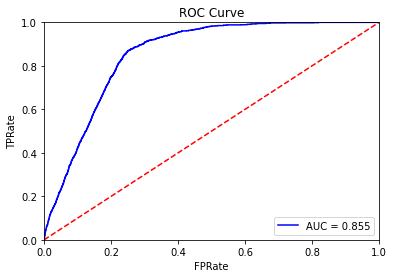

In [7]:
plt.title('ROC Curve')
plt.plot(nfpr, ntpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPRate')
plt.xlabel('FPRate')
plt.show()

In [12]:
pr_auc = auc(nrec, nprec)
avg_prec = average_precision_score(ny_test, nprob1, pos_label=2)
avg_prec_pred = average_precision_score(ny_test, ny_pred, pos_label=2)
print(f'pr_auc = {pr_auc}')
print(f'avg_prec = {avg_prec}')
print(f'avg_prec_pred = {avg_prec_pred}')

pr_auc = 0.11361188760283794
avg_prec = 0.11408866453802519
avg_prec_pred = 0.08214381315580749


In [13]:
pr_thresh.shape

(45216,)

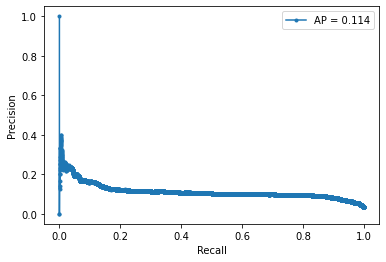

In [14]:
# calculate the no skill line as the proportion of the positive class
#no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
#plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(nrec, nprec, marker='.', label='AP = %0.3f' % avg_prec)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()